Enter the number of neurons:2
Enter the value of Lamda: 0.5
Enter the number of epoch: 2
Enter eeta: 0.03
0.09840602382344454
[0.13810113720118866, 0.13809488061233846]
[[0.2674296440954483, 0.18434456926431234], [0.9460884874541355, 0.9154929942416747]] [[-0.4606849721808883, 0.05848326280426777], [-0.4939775686664761, 0.17554547544885804]]


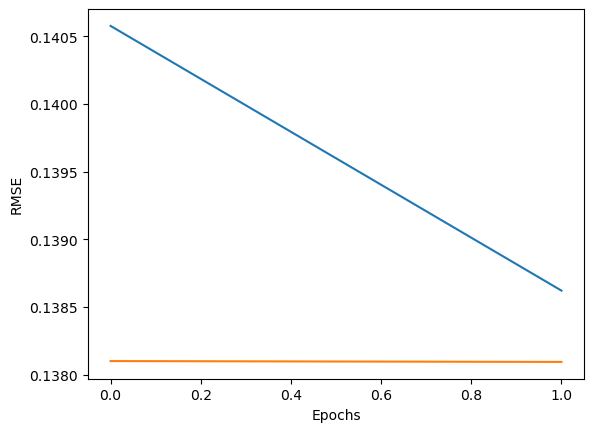

In [2]:
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Reading the collected data
dataf=pd.read_csv("ce889_dataCollection.csv",header = None)

# Clearing the duplicates, NaN values and getting min and max values 
dataf.duplicated().sum()
dataf.min()
dataf.max()
dataf.dropna(inplace=True)

# Normalizing the Data
dataf=dataf.apply(lambda y:(y-y.min())/(y.max()-y.min()))

# Seperating the Collected values into 70% Train set, 15% Validation set and 15% Test set
train_d=int(0.7*len(dataf))
shuffle_d=dataf.sample(frac=1)
train_s=shuffle_d[:train_d]
val_s=shuffle_d[train_d:]
train_s.to_csv("R:/Neural_Netw/ce889_NNet_assignment/ce889_dataCollection_trainSet.csv",index=False,header=False)
a = round(len(val_s)/2)
val_ss = val_s[:a]
test_ss= val_s[a:]
test_ss.to_csv("R:/Neural_Netw/ce889_NNet_assignment/ce889_dataCollection_test_Set.csv",index=False,header=False)
val_ss.to_csv("R:/Neural_Netw/ce889_NNet_assignment/ce889_dataCollection_validationSet.csv",index=False,header=False)

# Creating two lists to store rmse values from train and validation set
rmsel=[]
rmsel2=[]     

hn=int(input('Enter the number of neurons:'))
inputs=2
outputs=2

l=float(input("Enter the value of Lamda: "))
w1=[]
w2=[]     # Creating two lists to store weights from input to hidden and hidden to output

for i in range(inputs):
    v=[]
    for j in range(hn):
        v.append(random.random())   # Inserting the random weights into two lists and creating in the form of matrices.
    w1.append(v)
for i in range(hn):
    w=[]
    for j in range(outputs):
        w.append(random.random())
    w2.append(w)

# Enter Epochs
epoc=int(input('Enter the number of epoch: '))
    
# Creating lists to store calculated errors for the RMSE Calculation
e=[]

ee=[]

eee=[]

# Input for Eta and Alpha values
eta=float(input("Enter eeta: "))


# Epoch Starts
for i in range(epoc):
    
    # Training set
    # Reading the training set data
    dataf=open("R:/Neural_Netw/ce889_NNet_assignment/ce889_dataCollection_trainSet.csv",'r')  
    
    for i in dataf:
        split1=i.rstrip().split(',')
        
        # Creating input and output lists to store values from train set data 
        inp=[]
        out=[]
        for i in range(len(split1)):
            if i==0 or i==1:
                inp.append(float(split1[i]))
            else:
                out.append(float(split1[i]))
        
      

 #  weight mult from input to hidden
        
        v1=[]
        def weight_mult_1():
            for i in range(hn):
                r=w1[0][i]*(inp[0])+w1[1][i]*(inp[1])
                v1.append(r)
            return v1
        weight_mult_1()
        
# Activation function for hidden layer
        h1=[]
        def activatn_func_1(v1):
            for i in v1:
                q=1/(1+math.exp((-l)*(i)))
                h1.append(q)
            return h1
        activatn_func_1(v1)
        
# weight mult from hidden to output
        
        v2=[]
        def weight_mult_2():
            for i in range(outputs):
                n=0
                for j in range(hn):
                    r=w2[j][i]*h1[j]
                    n=n+r
                v2.append(n)
            return v2
        weight_mult_2()
        #print(v2)

# activation function for output layer

        y1=[]
        def activatn_func_2(v2):
            for i in v2:
                a=1/(1+math.exp((-l)*(i)))
                y1.append(a)
            return y1
        activatn_func_2(v2)

# error calculation
        
        e1=[]
        def error(y1,out):
            for i in range(len(out)):
                e=(out[i])-y1[i]
                e1.append(e)
            return e1
        error(y1,out)
        e.append(e1)

# Local grad from output to hidden
        
        Sk=[]
        def local_grad_1():
            for t in range(len(e1)):             
                r=l*y1[t]*(1-y1[t])*e1[t]
                Sk.append(r)
            return Sk
        local_grad_1()

# Delta weights from output to hidden

        delt_i_w=[]
        def weight_updatn_1():
            for i in range(outputs):
                uy=[]
                for j in range(hn):
                    f=(eta*h1[j]*Sk[i])
                    uy.append(f)
                delt_i_w.append(uy)
            return delt_i_w
        weight_updatn_1()

# New weights in one list
        
        delt_i_w_transp=[]
        for i in range(hn):
            xx=[]
            for j in range(len(delt_i_w)):
                xx.append(delt_i_w[j][i])
            delt_i_w_transp.append(xx)
        
        

# Adding old weights and delta weights from output to hidden

        new_o_weights=[]
        for i in range(len(delt_i_w_transp)):
            a=[]
            for j in range(len(delt_i_w_transp[i])):
                r = w2[i][j]+delt_i_w_transp[i][j]
                a.append(r)    
            new_o_weights.append(a)

# Calculation of Hidden Gradient from hidden to input

    
        summ=[]
        for i in range(hn):
            b=0
            for j in range(len(Sk)):
                b+= Sk[j]*w2[i][j]
            summ.append(b)
        Sk2=[]
        def hidden_grad_1():
            for i in range(hn):
                w=l*h1[i]*(1-h1[i])*summ[i]
                Sk2.append(w)
            return Sk2
        hidden_grad_1()

# Delta weights from hidden to input

        delta_o_w=[]
        def weight_updatn_2():
            for i in range(len(Sk2)):
                u1=[]
                for j in range(inputs):
                    f=(eta*Sk2[i]*float(inp[j]))
                    u1.append(f)
                delta_o_w.append(u1)
            return delta_o_w
        weight_updatn_2()
        
        delta_o_w_transp=[]
        for i in range(inputs):
            xy=[]
            for j in range(len(delta_o_w)):
                xy.append(delta_o_w[j][i])
            delta_o_w_transp.append(xy)


# Adding old weights and delta weights from hidden to input

        new_i_weights=[]
        for i in range(len(delta_o_w_transp)):
            c=[]
            for j in range(len(delta_o_w_transp[i])):
                r=w1[i][j]+delta_o_w_transp[i][j]
                c.append(r)
            new_i_weights.append(c)
            


        #replacing old weights with new weights
        w1=new_i_weights                     
        w2=new_o_weights
        
    w1=new_i_weights                     
    w2=new_o_weights
    
# Calculate RMSE for train set

    su=0
    su2=0
    for i in range(len(e)):
        su=su+ (e[i][0])**2
        su2=su2+(e[i][1])**2
    m1=su/len(e)
    m2=su2/len(e)
    rmse1=math.sqrt(m1)
    rmse2=math.sqrt(m2)
    
    def rmse():
        rm=(rmse1+rmse2)/2
        return rm

    rms_val=rmse()
    rmsel.append(rms_val)




# Validation set
    # Reading the validation set data
    dataf2=open("R:/Neural_Netw/ce889_NNet_assignment/ce889_dataCollection_validationSet.csv",'r')  
    
    for i in dataf2:
        split1=i.rstrip().split(',')
        
        # Creating input and output lists to store values from validation set data 
        inp=[]
        out=[]
        for i in range(len(split1)):
            if i==0 or i==1:
                inp.append(float(split1[i]))
            else:
                out.append(float(split1[i]))
        
      


    #  weight mult from input to hidden
        
        v1=[]
        def weight_mult_1():
            for i in range(hn):
                r=w1[0][i]*(inp[0])+w1[1][i]*(inp[1])
                v1.append(r)
            return v1
        weight_mult_1()

# Activation function for hidden layer
        h1=[]
        def activatn_func_1(v1):
            for i in v1:
                q=1/(1+math.exp((-l)*(i)))
                h1.append(q)
            return h1
        activatn_func_1(v1)

# weight mult from hidden to output

        v2=[]
        def weight_mult_2():
            for i in range(outputs):
                n=0
                for j in range(hn):
                    r=w2[j][i]*(h1[j])
                    n=n+r
                v2.append(n)
            return v2
        weight_mult_2()

# activation function for output layer

        
        y1=[]
        def activatn_func_2(v2):
            for i in v2:
                a=1/(1+(math.exp((-l)*(i))))
                y1.append(a)
            return y1
        activatn_func_2(v2)

# error calculation
        
        e1=[]
        def error(y1,out):
            for i in range(len(out)):
                e=(float(out[i])-y1[i])
                e1.append(e)
            return e1
        error(y1,out)
        ee.append(e1)

# Calculate RMSE for validation set
    su=0
    su2=0
    for i in range(len(ee)):
        su=su+ (ee[i][0])**2
        su2=su2+(ee[i][1])**2
    m1=su/len(ee)
    m2=su2/len(ee)
    rmse1=math.sqrt(m1)
    rmse2=math.sqrt(m2)
    
    def rmse():
        rm=(rmse1+rmse2)/2
        return rm

    rms_val2=rmse()
    rmsel2.append(rms_val2)
    
dataf=open("R:/Neural_Netw/ce889_NNet_assignment/ce889_dataCollection_test_Set.csv",'r')  

for i in dataf:
    split1=i.rstrip().split(',')
        
    # Creating input and output lists to store values from test set data 
    inp=[]
    out=[]
    for i in range(len(split1)):
        if i==0 or i==1:
            inp.append(float(split1[i]))
        else:
            out.append(float(split1[i]))
    
      

 #  weight mult from input to hidden
        
    v1=[]
    def weight_mult_1():
        for i in range(hn):
            r=w1[0][i]*(inp[0])+w1[1][i]*(inp[1])
            v1.append(r)
        return v1
    weight_mult_1()
        
# Activation function for hidden layer
    h1=[]
    def activatn_func_1(v1):
        for i in v1:
            q=1/(1+math.exp((-l)*(i)))
            h1.append(q)
        return h1
    activatn_func_1(v1)
        
# weight mult from hidden to output
        
    v2=[]
    def weight_mult_2():
        for i in range(outputs):
            n=0
            for j in range(hn):
                r=w2[j][i]*h1[j]
                n=n+r
            v2.append(n)
        return v2
    weight_mult_2()
  

 # activation function for output layer

         # Predicted output List
    y1=[]
    def activatn_func_2(v2):
        for i in v2:
            a=1/(1+math.exp((-l)*(i)))
            y1.append(a)
        return y1
    activatn_func_2(v2)

# error calculation
        
    e1=[]
    def error(y1,out):
        for i in range(len(out)):
            e=(out[i])-y1[i]
            e1.append(e)
        return e1
    error(y1,out)
    eee.append(e1)

# Calculate RMSE for test set

    su=0
    su2=0
    for i in range(len(eee)):
        su=su+ (eee[i][0])**2
        su2=su2+(eee[i][1])**2
    m1=su/len(ee)
    m2=su2/len(ee)
    rmse1=math.sqrt(m1)
    rmse2=math.sqrt(m2)
    
    def rmse():
        rm=(rmse1+rmse2)/2
        return rm

    rms_val3=rmse()
    
print(rms_val3)
print(rmsel2)
print(w1,w2)

# Plot graph for the RMSE Values of Train and Validation Set

plt.plot(rmsel)
plt.plot(rmsel2)
plt.xlabel('Epochs') 
plt.ylabel('RMSE') 
plt.show()

# 3
